## preamble

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from scipy.spatial import distance
from sklearn.preprocessing import minmax_scale

sns.set(style="white", color_codes=True)

## globals

In [4]:
seed        = 1234
n_points    = 10000
bins        = 100
no_quantile = 10
scale       = True

## generate toy data in 2D

In [5]:
xx = np.array([-0.51, 51.2])
yy = np.array([330.9, 10000.9])

means = [xx.mean(), yy.mean()]  

stds = [xx.std() / 3, yy.std() / 3]

corr = 0.7         # correlation

covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

(d1, d2) = np.random.multivariate_normal(means, covs, n_points).T

X = np.concatenate((d1.reshape(n_points, 1), d2.reshape(n_points, 1)), axis=1)
X = pd.DataFrame(X, columns=['d1', 'd2'])

X.sample(10, random_state=seed)

,d1,d2
2374,8.648548,3421.701418
1784,23.828869,6103.869175
6301,36.302525,8219.518942
1600,22.380395,5564.685399
7920,24.173132,6142.154192
6868,23.757688,6758.099965
9082,35.231621,7387.442704
9227,25.710992,4602.191863
6816,39.404325,8043.728433
1492,15.711880,4086.072694


## scale

In [6]:
X['d1_scaled'] = minmax_scale(X['d1'])
X['d2_scaled'] = minmax_scale(X['d2'])

X.sample(10, random_state=seed)

,d1,d2,d1_scaled,d2_scaled
2374,8.648548,3421.701418,0.234338,0.345130
1784,23.828869,6103.869175,0.448832,0.579418
6301,36.302525,8219.518942,0.625082,0.764220
1600,22.380395,5564.685399,0.428366,0.532320
7920,24.173132,6142.154192,0.453697,0.582762
6868,23.757688,6758.099965,0.447826,0.636565
9082,35.231621,7387.442704,0.609950,0.691538
9227,25.710992,4602.191863,0.475426,0.448246
6816,39.404325,8043.728433,0.668910,0.748865
1492,15.711880,4086.072694,0.334141,0.403163


## visualize the data

<IPython.core.display.Javascript object>


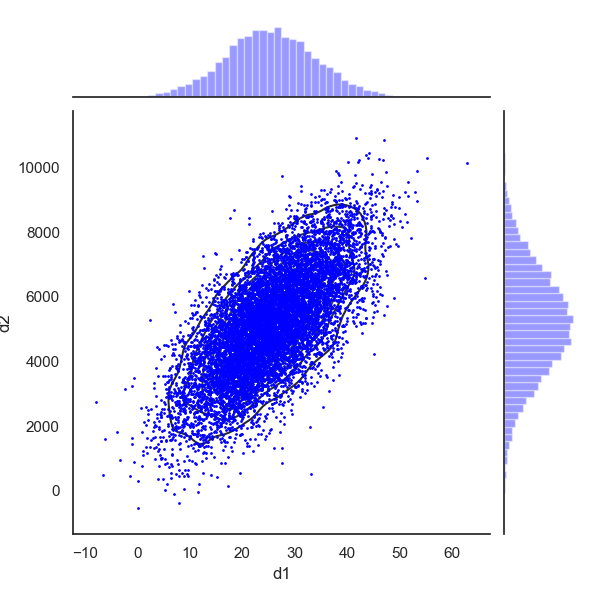

In [7]:
g = sns.jointplot(X['d1'], X['d2'], kind='scatter', s=1, color='blue')
g.plot_joint(sns.kdeplot, zorder=0, n_levels=no_quantile)

<IPython.core.display.Javascript object>


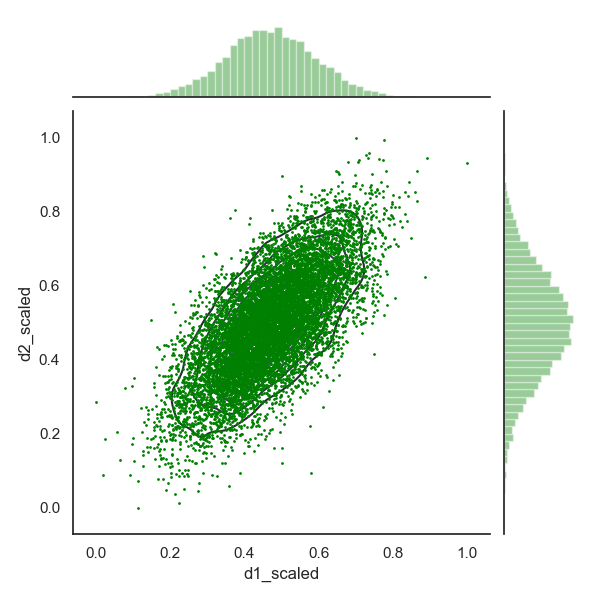

In [9]:
g = sns.jointplot(X['d1_scaled'], X['d2_scaled'], kind='scatter', s=1, color='green')
g.plot_joint(sns.kdeplot, zorder=0, n_levels=no_quantile)

## define quantiles and their labels

In [10]:
quantiles = np.arange(no_quantile+1)/no_quantile
quantiles

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [11]:
quantile_labels = (np.arange(no_quantile)+1)/no_quantile
quantile_labels

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## calculate mahalanobis distance

In [12]:
import pandas as pd
import scipy as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

X['mahala'] = mahalanobis(x=X[['d1', 'd2']], data=X[['d1', 'd2']])
X['mahala_scaled'] = mahalanobis(x=X[['d1_scaled', 'd2_scaled']], data=X[['d1_scaled', 'd2_scaled']])

X.sample(10, random_state=seed)

,d1,d2,d1_scaled,d2_scaled,mahala,mahala_scaled
2374,8.648548,3421.701418,0.234338,0.345130,3.902702,3.902702
1784,23.828869,6103.869175,0.448832,0.579418,0.987525,0.987525
6301,36.302525,8219.518942,0.625082,0.764220,3.574478,3.574478
1600,22.380395,5564.685399,0.428366,0.532320,0.571272,0.571272
7920,24.173132,6142.154192,0.453697,0.582762,0.963434,0.963434
6868,23.757688,6758.099965,0.447826,0.636565,2.455097,2.455097
9082,35.231621,7387.442704,0.609950,0.691538,1.965399,1.965399
9227,25.710992,4602.191863,0.475426,0.448246,0.298167,0.298167
6816,39.404325,8043.728433,0.668910,0.748865,3.482861,3.482861
1492,15.711880,4086.072694,0.334141,0.403163,1.263624,1.263624


note: mahalanobis distance on scaled dimensions is the same as the original dimensions

## calculate euclidean distance

In [14]:
def euclidean(d1, d2):
    point = [d1, d2]
    ref = [0.0]*len(point)
    dst = distance.euclidean(ref, point)
    return dst

X['euclidean'] = X.apply(lambda row: euclidean(row['d1'], row['d2']), axis=1)
X['euclidean_scaled'] = X.apply(lambda row: euclidean(row['d1_scaled'], row['d2_scaled']), axis=1)

X.sample(10, random_state=seed)

,d1,d2,d1_scaled,d2_scaled,mahala,mahala_scaled,euclidean,euclidean_scaled
2374,8.648548,3421.701418,0.234338,0.345130,3.902702,3.902702,3421.712348,0.417168
1784,23.828869,6103.869175,0.448832,0.579418,0.987525,0.987525,6103.915688,0.732923
6301,36.302525,8219.518942,0.625082,0.764220,3.574478,3.574478,8219.599109,0.987299
1600,22.380395,5564.685399,0.428366,0.532320,0.571272,0.571272,5564.730404,0.683273
7920,24.173132,6142.154192,0.453697,0.582762,0.963434,0.963434,6142.201760,0.738547
6868,23.757688,6758.099965,0.447826,0.636565,2.455097,2.455097,6758.141724,0.778308
9082,35.231621,7387.442704,0.609950,0.691538,1.965399,1.965399,7387.526716,0.922098
9227,25.710992,4602.191863,0.475426,0.448246,0.298167,0.298167,4602.263682,0.653418
6816,39.404325,8043.728433,0.668910,0.748865,3.482861,3.482861,8043.824949,1.004111
1492,15.711880,4086.072694,0.334141,0.403163,1.263624,1.263624,4086.102902,0.523632


## calculate quantiles

### based on mahalanobis distance

In [15]:
X['quantile_mahalanobis'] = pd.qcut(X['mahala'], q=no_quantile, labels=quantile_labels)
pd.value_counts(X['quantile_mahalanobis'].values)

1.0    1000
0.9    1000
0.8    1000
0.7    1000
0.6    1000
0.5    1000
0.4    1000
0.3    1000
0.2    1000
0.1    1000
dtype: int64

### based on euclidean distance

In [16]:
X['quantile_euclidean'] = pd.qcut(X['euclidean'], q=no_quantile, labels=quantile_labels)
pd.value_counts(X['quantile_euclidean'].values)

1.0    1000
0.9    1000
0.8    1000
0.7    1000
0.6    1000
0.5    1000
0.4    1000
0.3    1000
0.2    1000
0.1    1000
dtype: int64

In [17]:
X['quantile_euclidean_scaled'] = pd.qcut(X['euclidean_scaled'], q=no_quantile, labels=quantile_labels)
pd.value_counts(X['quantile_euclidean'].values)

1.0    1000
0.9    1000
0.8    1000
0.7    1000
0.6    1000
0.5    1000
0.4    1000
0.3    1000
0.2    1000
0.1    1000
dtype: int64

In [18]:
X.sample(10, random_state=seed)

,d1,d2,d1_scaled,d2_scaled,mahala,mahala_scaled,euclidean,euclidean_scaled,quantile_mahalanobis,quantile_euclidean,quantile_euclidean_scaled
2374,8.648548,3421.701418,0.234338,0.345130,3.902702,3.902702,3421.712348,0.417168,0.9,0.2,0.1
1784,23.828869,6103.869175,0.448832,0.579418,0.987525,0.987525,6103.915688,0.732923,0.4,0.8,0.7
6301,36.302525,8219.518942,0.625082,0.764220,3.574478,3.574478,8219.599109,0.987299,0.9,1.0,1.0
1600,22.380395,5564.685399,0.428366,0.532320,0.571272,0.571272,5564.730404,0.683273,0.3,0.6,0.5
7920,24.173132,6142.154192,0.453697,0.582762,0.963434,0.963434,6142.201760,0.738547,0.4,0.8,0.7
6868,23.757688,6758.099965,0.447826,0.636565,2.455097,2.455097,6758.141724,0.778308,0.8,0.9,0.8
9082,35.231621,7387.442704,0.609950,0.691538,1.965399,1.965399,7387.526716,0.922098,0.7,1.0,1.0
9227,25.710992,4602.191863,0.475426,0.448246,0.298167,0.298167,4602.263682,0.653418,0.2,0.4,0.5
6816,39.404325,8043.728433,0.668910,0.748865,3.482861,3.482861,8043.824949,1.004111,0.9,1.0,1.0
1492,15.711880,4086.072694,0.334141,0.403163,1.263624,1.263624,4086.102902,0.523632,0.5,0.3,0.2


note: quantile_euclidean != quantile_euclidean_scaled

## plot quantiles

<IPython.core.display.Javascript object>


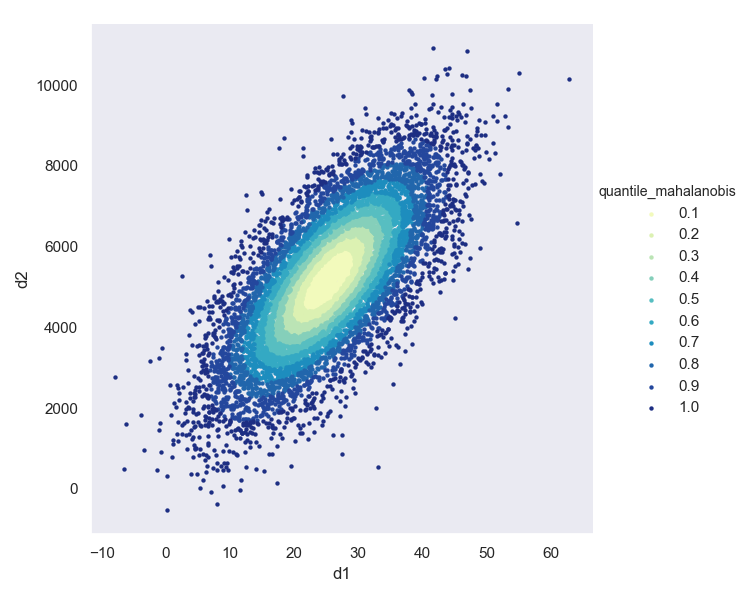

<IPython.core.display.Javascript object>


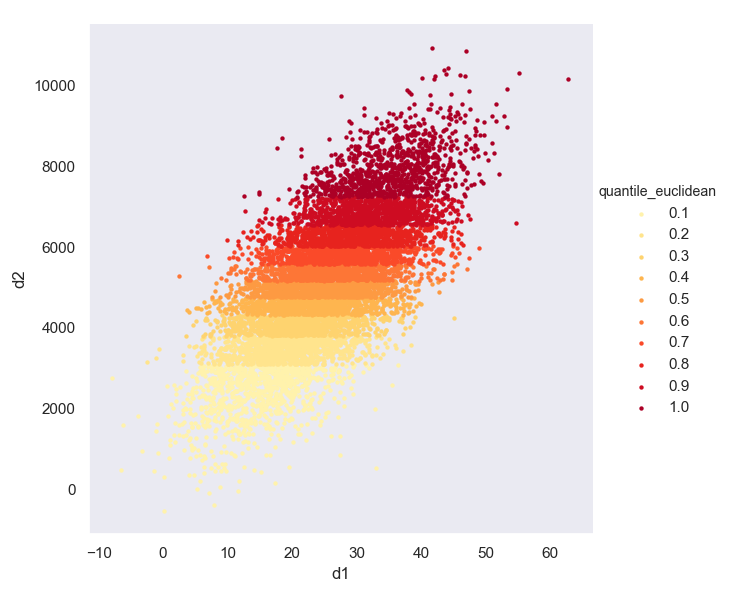

<IPython.core.display.Javascript object>


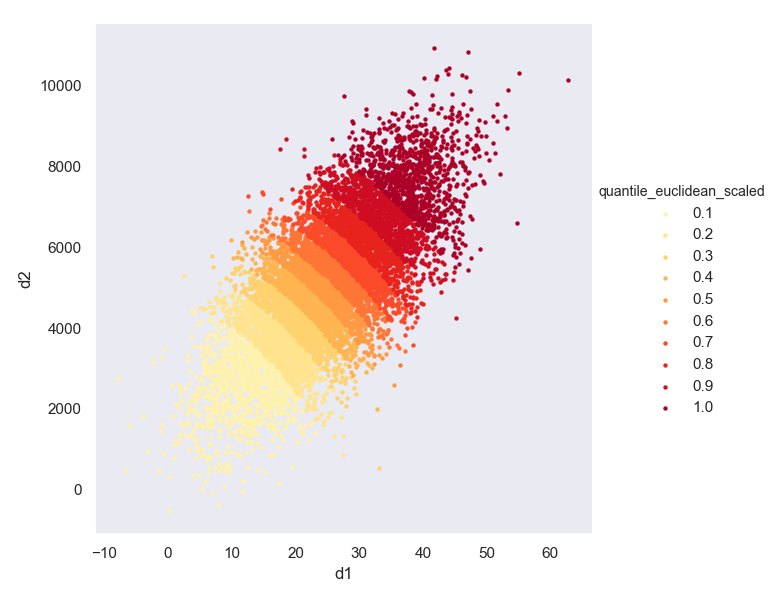

In [23]:
sns.set(style="dark")

sns.pairplot(#ax=ax1,
                data=X, 
                x_vars=['d1'], 
                y_vars=['d2'], 
                height=6, 
                plot_kws=dict(s=10, linewidth=0), 
                hue="quantile_mahalanobis", 
                palette="YlGnBu")

sns.pairplot(#ax=ax2,
                data=X, 
                x_vars=['d1'], 
                y_vars=['d2'], 
                height=6, 
                plot_kws=dict(s=10, linewidth=0), 
                hue="quantile_euclidean", 
                palette="YlOrRd")

sns.pairplot(#ax=ax2,
                data=X, 
                x_vars=['d1'], 
                y_vars=['d2'], 
                height=6, 
                plot_kws=dict(s=10, linewidth=0), 
                hue="quantile_euclidean_scaled", 
                palette="YlOrRd")